# CS 3300 Data Science - Lab 5: Exploratory Data Analysis with Dimensionality Reduction

## Stuart Harley

### Introduction

In this lab, we are exploring a dataset of emails represented as JSON files. Each email is classified as either spam or ham. In processing of these files, we create a sparse matrix of words contained in each email. Because this matrix ends up being very large, we are unable to analyze every word/feature in the matrix. Therefore, we are exploring dimensionality reduction using a Singular Value Decomposition (SVD) method in order to create fewer features that will allow us to predict whether an email is either spam or ham.

### Importing Libraries

In [1]:
import glob
import json
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

### Part I: Loading the Data

Loading email data from json files into a pandas dataframe.

In [2]:
files = glob.glob('email_json/*', recursive=True)

In [3]:
email_list = []
for file in files:
    with open(file) as file:
        email_list.append(json.load(file))

In [4]:
df = pd.DataFrame.from_records(email_list)
df['category'] = df['category'].astype('category')

In [5]:
df.head()

,body,category,from_address,subject,to_address
0,\n\n\n\n\n\n\nDo you feel the pressure to perf...,spam,"""Tomas Jacobs"" <RickyAmes@aol.com>","Generic Cialis, branded quality@",the00@speedy.uwaterloo.ca
1,"Hi, i've just updated from the gulus and I che...",ham,Yan Morin <yan.morin@savoirfairelinux.com>,Typo in /debian/README,debian-mirrors@lists.debian.org
2,authentic viagra\n\nMega authenticV I A G R A...,spam,"""Sheila Crenshaw"" <7stocknews@tractionmarketin...",authentic viagra,<the00@plg.uwaterloo.ca>
3,"\nHey Billy, \n\nit was really fun going out t...",spam,"""Stormy Dempsey"" <vqucsmdfgvsg@ruraltek.com>",Nice talking with ya,opt4@speedy.uwaterloo.ca
4,"\n\n\n\n\n\n\nsystem"" of the home. It will ha...",spam,"""Christi T. Jernigan"" <dcube@totalink.net>",or trembling; stomach cramps; trouble in sleep...,ktwarwic@speedy.uwaterloo.ca


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
body            63542 non-null object
category        63542 non-null category
from_address    63542 non-null object
subject         63410 non-null object
to_address      63141 non-null object
dtypes: category(1), object(4)
memory usage: 2.0+ MB


The column names are listed above. The type of category is category, the other features are strings.

### Part II: Extract Features

Creating a feature matrix of words and their counts for each email. We use a binary=True option. This makes use only keep track of whether the word is present in the message instead of counting the number of occurances. So each value in the feature matrix will be either 0 or 1.

In [7]:
vectorizer = CountVectorizer(binary=True)
word_matrix = vectorizer.fit_transform(df['body'])

In [8]:
word_matrix

<63542x300984 sparse matrix of type '<class 'numpy.int64'>'
	with 6885706 stored elements in Compressed Sparse Row format>

There were 63,542 emails in the dataframe, therefore there are 63,542 rows in the matrix since each row represents one email. There are 300,984 columns in the matrix which means that there are 300,984 different words in all of the emails combined. There are 6,885,706 non-zero entries in the matrix.

In [9]:
feature_words = vectorizer.get_feature_names()
print('Entries in feature matrix: ' + str(len(feature_words)))

Entries in feature matrix: 300984


In [10]:
print('Column Index of "work": ' + str(feature_words.index('work')))
print('Column Index of "love": '+ str(feature_words.index('love')))
print('Column Index of "different": ' + str(feature_words.index('different')))

Column Index of "work": 289649
Column Index of "love": 183355
Column Index of "different": 125499


In [11]:
print('Column for "work"\n' + str(word_matrix[:,289649]))

Column for "work"
  (4, 0)	1
  (5, 0)	1
  (13, 0)	1
  (27, 0)	1
  (28, 0)	1
  (33, 0)	1
  (57, 0)	1
  (68, 0)	1
  (72, 0)	1
  (92, 0)	1
  (124, 0)	1
  (125, 0)	1
  (134, 0)	1
  (138, 0)	1
  (139, 0)	1
  (140, 0)	1
  (143, 0)	1
  (148, 0)	1
  (155, 0)	1
  (165, 0)	1
  (181, 0)	1
  (186, 0)	1
  (197, 0)	1
  (201, 0)	1
  (202, 0)	1
  :	:
  (63180, 0)	1
  (63200, 0)	1
  (63205, 0)	1
  (63211, 0)	1
  (63240, 0)	1
  (63241, 0)	1
  (63249, 0)	1
  (63250, 0)	1
  (63253, 0)	1
  (63255, 0)	1
  (63371, 0)	1
  (63382, 0)	1
  (63385, 0)	1
  (63398, 0)	1
  (63403, 0)	1
  (63415, 0)	1
  (63416, 0)	1
  (63425, 0)	1
  (63426, 0)	1
  (63444, 0)	1
  (63457, 0)	1
  (63507, 0)	1
  (63512, 0)	1
  (63531, 0)	1
  (63535, 0)	1


In [12]:
print('Column for "love"\n' + str(word_matrix[:,183355]))

Column for "love"
  (3, 0)	1
  (14, 0)	1
  (49, 0)	1
  (81, 0)	1
  (193, 0)	1
  (221, 0)	1
  (224, 0)	1
  (290, 0)	1
  (342, 0)	1
  (377, 0)	1
  (381, 0)	1
  (479, 0)	1
  (496, 0)	1
  (524, 0)	1
  (600, 0)	1
  (631, 0)	1
  (680, 0)	1
  (736, 0)	1
  (852, 0)	1
  (917, 0)	1
  (929, 0)	1
  (938, 0)	1
  (952, 0)	1
  (954, 0)	1
  (974, 0)	1
  :	:
  (62677, 0)	1
  (62694, 0)	1
  (62715, 0)	1
  (62716, 0)	1
  (62789, 0)	1
  (62791, 0)	1
  (62799, 0)	1
  (62806, 0)	1
  (62807, 0)	1
  (62808, 0)	1
  (62994, 0)	1
  (62999, 0)	1
  (63062, 0)	1
  (63092, 0)	1
  (63105, 0)	1
  (63142, 0)	1
  (63177, 0)	1
  (63185, 0)	1
  (63289, 0)	1
  (63312, 0)	1
  (63340, 0)	1
  (63415, 0)	1
  (63424, 0)	1
  (63511, 0)	1
  (63515, 0)	1


In [13]:
print('Column for "different"\n' + str(word_matrix[:,125499]))

Column for "different"
  (10, 0)	1
  (15, 0)	1
  (49, 0)	1
  (75, 0)	1
  (77, 0)	1
  (79, 0)	1
  (243, 0)	1
  (259, 0)	1
  (267, 0)	1
  (268, 0)	1
  (277, 0)	1
  (280, 0)	1
  (282, 0)	1
  (389, 0)	1
  (417, 0)	1
  (458, 0)	1
  (464, 0)	1
  (499, 0)	1
  (534, 0)	1
  (590, 0)	1
  (605, 0)	1
  (620, 0)	1
  (663, 0)	1
  (668, 0)	1
  (743, 0)	1
  :	:
  (62914, 0)	1
  (62918, 0)	1
  (62924, 0)	1
  (62939, 0)	1
  (62956, 0)	1
  (62962, 0)	1
  (62963, 0)	1
  (62969, 0)	1
  (62970, 0)	1
  (62971, 0)	1
  (62972, 0)	1
  (62982, 0)	1
  (62996, 0)	1
  (63004, 0)	1
  (63084, 0)	1
  (63107, 0)	1
  (63120, 0)	1
  (63180, 0)	1
  (63214, 0)	1
  (63292, 0)	1
  (63304, 0)	1
  (63336, 0)	1
  (63368, 0)	1
  (63415, 0)	1
  (63441, 0)	1


### Part III: Dimensionality Reduction

Transforming the feature matrix into a new feature matrix with 10 columns (components) using SVD.

In [14]:
svd = TruncatedSVD(n_components=10)
svd_matrix = svd.fit_transform(word_matrix)
svd_matrix.shape

(63542, 10)

Plotting the explain variance ratios of the components.

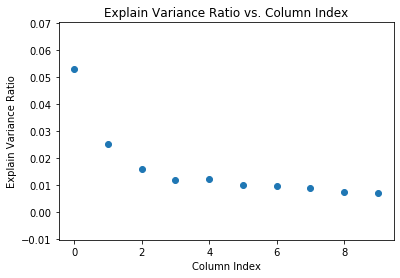

In [15]:
fig, axes = plt.subplots()
axes.scatter(np.linspace(0, 9, 10), svd.explained_variance_ratio_)
axes.set_xlabel('Column Index')
axes.set_ylabel('Explain Variance Ratio')
axes.set_title('Explain Variance Ratio vs. Column Index');

The two components with the highest explained variance ratios are the first and second columns (components), (indexes 0 and 1).

### Part IV: Visualization

Creating a scatter plot using the two components with the highest explained variance ratios.

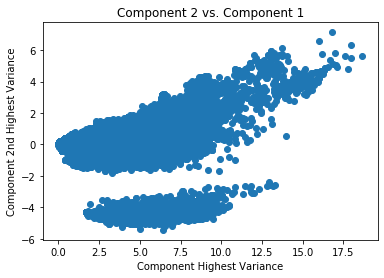

In [16]:
fig, axes = plt.subplots()
axes.scatter(svd_matrix[:,0], svd_matrix[:,1])
axes.set_xlabel('Component Highest Variance')
axes.set_ylabel('Component 2nd Highest Variance')
axes.set_title('Component 2 vs. Component 1');

Creating a second scatter plot using the same two components. This time coloring the points based on the category value column of the DataFrame.

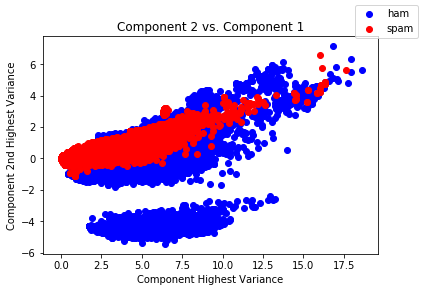

In [17]:
fig, axes = plt.subplots()
ham_index = np.where(df['category'] == 'ham')
spam_index = np.where(df['category'] == 'spam')
axes.set_xlabel('Component Highest Variance')
axes.set_ylabel('Component 2nd Highest Variance')
axes.set_title('Component 2 vs. Component 1')
plt.scatter(svd_matrix[ham_index,0], svd_matrix[ham_index,1], color='b', label='ham')
plt.scatter(svd_matrix[spam_index,0], svd_matrix[spam_index,1], color='r', label='spam')
fig.legend();

### Reflection Questions

1. When looking at one of the JSON files in a text editor, the pattern is {"key": "value", repeated 5 times}. The keys are the feature values from our pandas dataframe (category, to_address, from_address, subject, body). The values are different for each file, which correspond to a single row of the dataframe. 

2. If we assume that a 32-bit (4-byte) floating point value is used to store the counts in a dense matrix instead of our sparse matrix, the memory usage would be much higher. 63542 rows * 300984 cols * 4-bytes / 1,000,000,000 (byte-to-GB-ratio) = ~76.5 GB

3. If we assume out sparse matrix uses one 32-bit (4-byte) floating point number and one 32-bit (4-byte) integer for each nonzero entry and one 32-bit (4-byte) integer for each row, the total memory usage would be: 6885706 nonzero entries * 8 bytes per entry + 63542 rows * 4 bytes per row / 1,000,000,000 (byte-to-GB-ratio) = ~.055 GB

4. The sparsity ratio is 100 * (6885706 nonzero entries / 1.91*10^10 possible entries) = ~.036

5. Based on this analysis, the sparse matrix is better suited for this situation. This is since the sparse matrix contains the same data but takes up ~.072% of the space of the hypothetical dense matrix.

6. When looking only at the first scatter plot, there are 2 distinct groups of points. I would assume that this pattern appears because one group is spam and the other group is ham.

7. When looking at the second plot, the lower group is only ham messages. In comparison, all of the spam messages are in the upper group. However, the upper group also contains ham messages, so it is not a perfect division of spam and ham messages.

### Conclusion

Using a SVD method, we were able to reduce the dimensions of our feature matrix to create a matrix of 10 features (components/columns). Looking at the two features with the highest variance, we were able to plot the messages into two distinct groups. All of the spam messages were in one of these groups though other ham messages were also included in this group. Therefore, this model still needs some work but the SVD method allowed us to greater reduce the number of features in the matrix while still allowing features to be predictive.